## Introduction to Machine Learning
### Subfield of AI, ability of machine to automatically learn from data and improve experience without being explicitly programmed.
### Learning components: ML Algorithm and Data
### Data (X,y)
### X -predictors (feature-vectors) y-response variable 
###Data(X,y)
### X--->y Mapping function 
### Ability to predict
# Role of Algorithm
## What is model?
# Simple Form: model=Data(X,y) + Algorithm
## Types of Machine Learning:
[1] Supervised ML: 
[2] Unsupervised ML
[3] Reinforcement ML

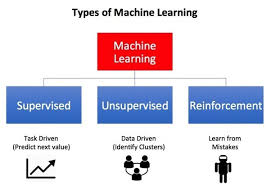


#Lab5A- Machine Learning Approach for Cybersecurity
## Objective:
####To detect computer network intrusion using machine learning techniques.
######Reference: https://www.kdd.org/kdd-cup/view/kdd-cup-1999/Data

###Outcomes:
1. To load dataset in Python or R
2. To process and prepare data
3. Build a model for intrusion detection.
4. Use machine learning algorithms to detect intrusion.
5. Calculate accuracy and confusion matrix and prediction time
6. Compare the models


### Step-by-Step ML:
1. Understanding the business problem
2. Collect/Select dataset
3. Data Preprocessing: missing values, normilization, Label Encoding etc
4. Exploratory Data Analysis (EDA): Tryiing to establish the relationship between the variable.
5. Problem statement
###y=f(X) estimating the f()
X -->y 
-- Parametric Method
-- Non-Parametric Method
6. Data Partition- 80% Train and 20% test (hold-out)
7. Building the model
8. Evaluate the performance of model
9. Model tuning- Improve the performance- Hyperparameter Tuning




# Description: KDDCUP Dataset
#####This database(KDD Cup 1999 Data) contains a standard set of data to be audited, which includes a wide variety of intrusions simulated in a military network environment.
####Attacks fall into four main categories:
- DOS | denial-of-service | syn flood |
- R2L | unauthorized access from a remote machine | guessing password |
- U2R | unauthorized access to local superuser privileges | ‘’buffer overflow’’ attacks |
- probing | surveillance and other probing | port scanning

#Import important library in Google Colaboratory
- import pandas as pd
- import numpy as np
- import scipy as sp
- import matplotlib.pyplot as plt
- import seaborn as sns
- %matplotlib inline

In [ ]:
#Import Library
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Import KDDCUP IDS Dataset 
url='http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data_10_percent.gz'
#Create a dataframe 
df=pd.read_csv(url)

In [ ]:
#Review the dataset
print(df.shape)

(494020, 42)


In [ ]:
#Check the dimension
df.columns
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
# The CSV file has no column heads, so add them
df.columns = [
'duration',
'protocol_type',
'service',
'flag',
'src_bytes',
'dst_bytes',
'land',
'wrong_fragment',
'urgent',
'hot',
'num_failed_logins',
'logged_in',
'num_compromised',
'root_shell',
'su_attempted',
'num_root',
'num_file_creations',
'num_shells',
'num_access_files',
'num_outbound_cmds',
'is_host_login',
'is_guest_login',
'count',
'srv_count',
'serror_rate',
'srv_serror_rate',
'rerror_rate',
'srv_rerror_rate',
'same_srv_rate',
'diff_srv_rate',
'srv_diff_host_rate',
'dst_host_count',
'dst_host_srv_count',
'dst_host_same_srv_rate',
'dst_host_diff_srv_rate',
'dst_host_same_src_port_rate',
'dst_host_srv_diff_host_rate',
'dst_host_serror_rate',
'dst_host_srv_serror_rate',
'dst_host_rerror_rate',
'dst_host_srv_rerror_rate',
'outcome'
]

In [ ]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'outcome'],
      dtype='object')

In [ ]:
#Data Preprocessing
df.count()

duration                       494020
protocol_type                  494020
service                        494020
flag                           494020
src_bytes                      494020
dst_bytes                      494020
land                           494020
wrong_fragment                 494020
urgent                         494020
hot                            494020
num_failed_logins              494020
logged_in                      494020
num_compromised                494020
root_shell                     494020
su_attempted                   494020
num_root                       494020
num_file_creations             494020
num_shells                     494020
num_access_files               494020
num_outbound_cmds              494020
is_host_login                  494020
is_guest_login                 494020
count                          494020
srv_count                      494020
serror_rate                    494020
srv_serror_rate                494020
rerror_rate 

In [ ]:
#Review the dataset
df[0:5]

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome
0,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,39,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,49,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,59,59,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [ ]:
# Understnad the data types
df.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [ ]:
#Statistical Analysis
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,494020.000000,4.940200e+05,4.940200e+05,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.0,494020.0,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000
mean,47.979400,3.025616e+03,8.685232e+02,0.000045,0.006433,0.000014,0.034519,0.000152,0.148245,0.010212,0.000111,0.000036,0.011352,0.001083,0.000109,0.001008,0.0,0.0,0.001387,332.286347,292.907133,0.176687,0.176609,0.057434,0.057719,0.791547,0.020982,0.028997,232.471230,188.666034,0.753779,0.030906,0.601936,0.006684,0.176754,0.176443,0.058118,0.057412
std,707.747185,9.882191e+05,3.304003e+04,0.006673,0.134805,0.005510,0.782103,0.015520,0.355343,1.798328,0.010551,0.007793,2.012720,0.096416,0.011020,0.036482,0.0,0.0,0.037211,213.147129,246.322733,0.380717,0.381017,0.231624,0.232147,0.388190,0.082206,0.142398,64.744665,106.040236,0.410781,0.109259,0.481309,0.042133,0.380593,0.380920,0.230590,0.230141
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,117.000000,10.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,46.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,510.000000,510.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,511.000000,511.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,255.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,58329.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,884.000000,1.000000,2.000000,993.000000,28.000000,2.000000,8.000000,0.0,0.0,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#Groupby Function
# What are the types of intrusions, frequency count (attack distribution), how (Why, What,Where,When,Whom,How)
#Decribing the data:  Labeled Dataset-Outcome
# How many types of attack-22
print(len(df.outcome.unique()))
#What are the attacks:
print(df.outcome.unique())
#Attack distrubutions
df.outcome.describe()


23
['normal.' 'buffer_overflow.' 'loadmodule.' 'perl.' 'neptune.' 'smurf.'
 'guess_passwd.' 'pod.' 'teardrop.' 'portsweep.' 'ipsweep.' 'land.'
 'ftp_write.' 'back.' 'imap.' 'satan.' 'phf.' 'nmap.' 'multihop.'
 'warezmaster.' 'warezclient.' 'spy.' 'rootkit.']


count     494020
unique        23
top       smurf.
freq      280790
Name: outcome, dtype: object

In [ ]:
#Pandas Groupby
df.groupby('outcome')['outcome'].count()

outcome
back.                 2203
buffer_overflow.        30
ftp_write.               8
guess_passwd.           53
imap.                   12
ipsweep.              1247
land.                   21
loadmodule.              9
multihop.                7
neptune.            107201
nmap.                  231
normal.              97277
perl.                    3
phf.                     4
pod.                   264
portsweep.            1040
rootkit.                10
satan.                1589
smurf.              280790
spy.                     2
teardrop.              979
warezclient.          1020
warezmaster.            20
Name: outcome, dtype: int64

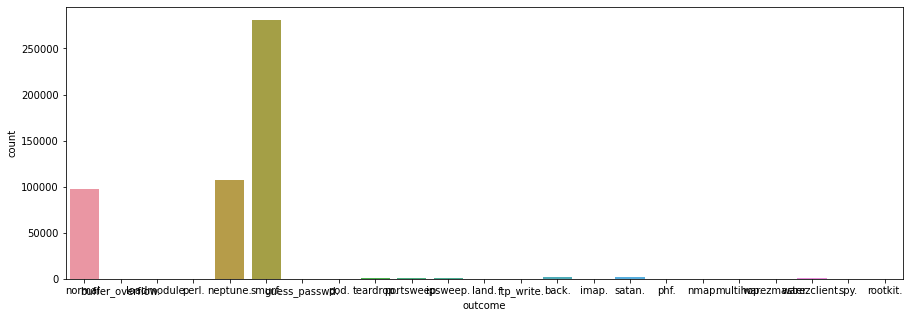

In [ ]:
#Graphical Analysis
plt.figure(figsize=(15,5))
sns.countplot(df.outcome)

In [ ]:
#
#df=df.sample(frac=0.01,replace=False )

In [ ]:
#Use groupby function of pandas list the no of intrusions.
#Find the max and min no of intrusions.


In [ ]:
#What are the types of attacks and which are those
print(len(df.outcome.unique()))
print(df.outcome.unique())



23
['normal.' 'buffer_overflow.' 'loadmodule.' 'perl.' 'neptune.' 'smurf.'
 'guess_passwd.' 'pod.' 'teardrop.' 'portsweep.' 'ipsweep.' 'land.'
 'ftp_write.' 'back.' 'imap.' 'satan.' 'phf.' 'nmap.' 'multihop.'
 'warezmaster.' 'warezclient.' 'spy.' 'rootkit.']


In [ ]:
# Data Missing: Drop the observation (crude) or Data Imputation


In [ ]:
#Intrusions are broadly classified into four categories
# Map these intrusions in four classes: DoS, R2L,U2R and Probe and Normal (No attack)
#probe={"ipsweep.","portsweep.","nmap.","satan."} (Total=04)
#r2l={"ftp_write.", "guess_passwd.","imap.","multihop.","phf.","spy.", "warezclient.","warezmaster."} (Total=08)
#u2r={"buffer_overflow.","loadmodule.","perl.", "rootkit."} (Total=04)
#dos={"back.", "land." ," "neptune.", "pod.","smurf.","teardrop."} (Total=6)
#normal = {"normal" }

In [ ]:
## 22 attacks ---> 4 classes (Probe,R2L, U2R, DoS)
df=df.replace(to_replace=["ipsweep.","portsweep.","nmap.","satan."],value="probe")
df=df.replace(to_replace=["ftp_write.", "guess_passwd.","imap.","multihop.","phf.","spy.", "warezclient.","warezmaster."],value="r2l")
df=df.replace(to_replace=["buffer_overflow.","loadmodule.","perl.", "rootkit."],value="u2r")
df=df.replace(to_replace=["back.", "land." ,"neptune.", "pod.","smurf.","teardrop."],value="dos")


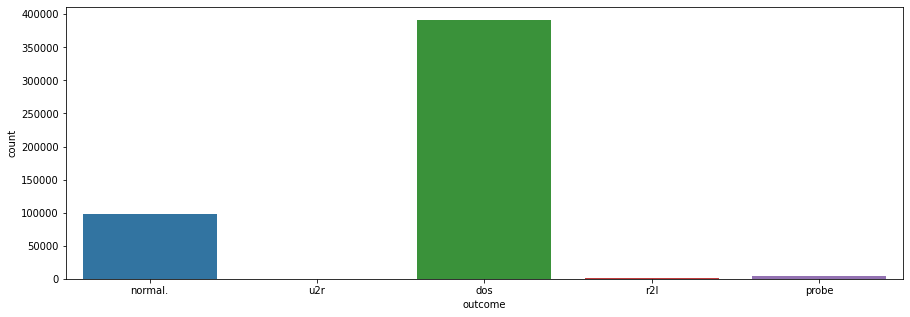

In [ ]:
#Replot 
plt.figure(figsize=(15,5))
sns.countplot(df.outcome)

In [ ]:
df.groupby('outcome')['outcome'].count()

outcome
dos        391458
normal.     97277
probe        4107
r2l          1126
u2r            52
Name: outcome, dtype: int64

In [ ]:
df.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [ ]:
#
df[0:5]

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome
0,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,39,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,49,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,59,59,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [ ]:
print(df.protocol_type.unique())
df.groupby(df.protocol_type)['protocol_type'].count()


['tcp' 'udp' 'icmp']


protocol_type
icmp    283602
tcp     190064
udp      20354
Name: protocol_type, dtype: int64

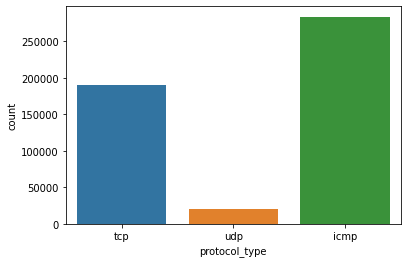

In [ ]:
sns.countplot(df.protocol_type)

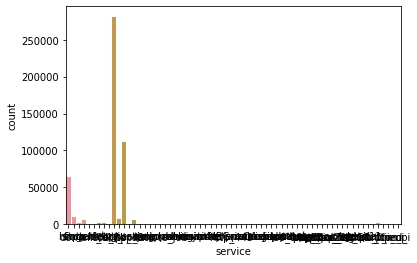

In [ ]:
sns.countplot(df.service)

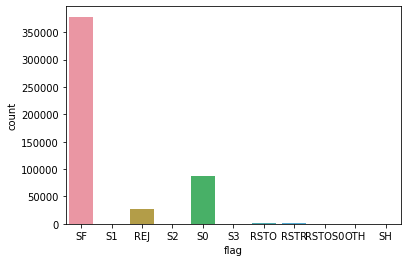

In [ ]:
sns.countplot(df.flag)

In [ ]:
len(df.service.unique())

66

In [ ]:
df.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [ ]:
df[0:2]

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome
0,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.


In [ ]:
#Label Encoding create classes and assign no from 0 to num_classes-1

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['protocol_type']=le.fit_transform(df['protocol_type'])
df['service']=le.fit_transform(df['service'])
df['flag']=le.fit_transform(df['flag'])
df['outcome']=le.fit_transform(df['outcome'])


In [ ]:
df.outcome.unique()

array([1, 4, 0, 3, 2])

In [ ]:
#Data Partition 80 % train (to build the model) and 20% test (validation)
#y=f(X)
#X-feature-vector (1-41)
#y- Class (42) 
X=df.iloc[:,:-1] # Feature Vector
y=df.iloc[:,-1] # Class Variable

In [ ]:
# Check the dimension
print(X.shape)
print(y.shape)

(494020, 41)
(494020,)


In [ ]:
#Spilt into two X  (X_train,y_train), (X_test,y_test)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=0)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(395216, 41)
(98804, 41)
(395216,)
(98804,)


In [ ]:
# Use confusion matrix (Tp,Tn, Fp,Fn) and ROC to evaluate the ML model.

In [ ]:
#Tabulate the results and compare :
# Sr. No . | Name of classifiers | Training Time/Prediction Time | Accuracy |Miss-classification Rate | Precision | Recall |  F1 Measure | Kappa Value | AUC | ROC |

In [ ]:
# Supervised ML Classifiers
#[1]LogisticRegression
#[2]LDA
#[3]KNN
#[4]Decision Tree (DT)
#[5]Random Forest 
#[6] Naive Bayes 

In [ ]:
# To build the classifier
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()

In [ ]:
#Train the model
import time
st=time.time()
clf.fit(X_train,y_train)
et=time.time()
print("Training Time:",et-st)

Training Time: 58.64835858345032


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
#Model Prediction
st=time.time()
ypred=clf.predict(X_test)
et=time.time()
print("prediction Time:",et-st)

prediction Time: 0.03470301628112793


In [ ]:
# Accuracy Score
st=time.time()
score=clf.score(X_test,y_test)
et=time.time()
print("prediction Time:",et-st)
print(score)
#Missclassification
mc=1-score
print(mc)

prediction Time: 0.0458981990814209
0.980982551313712
0.019017448686287963


In [ ]:
#Create confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ypred,y_test)
print(cm)

[[77648   307   336     9     0]
 [  535 19274   484   191     8]
 [    0     2     1     6     0]
 [    0     1     0     2     0]
 [    0     0     0     0     0]]


In [ ]:
#Probability values
ypred2=clf.predict_proba(X_test)
ypred2[0:5]

array([[6.78568290e-02, 9.19149501e-01, 4.89019658e-03, 8.10217341e-03,
        1.29996533e-06],
       [2.60071473e-02, 9.73755048e-01, 4.27783033e-05, 1.78508647e-04,
        1.65176408e-05],
       [9.99997083e-01, 2.91488456e-06, 2.26006562e-09, 2.47988485e-10,
        2.94546118e-11],
       [9.92661298e-01, 6.37302449e-03, 3.42012968e-04, 1.31603713e-04,
        4.92060340e-04],
       [9.90433037e-01, 8.22521318e-03, 4.83798225e-04, 1.91383661e-04,
        6.66568276e-04]])

In [ ]:
#Recall score
from sklearn.metrics import recall_score
print(recall_score(y_test,ypred,average='weighted'))
#PRECISION score
from sklearn.metrics import precision_score
print(precision_score(y_test,ypred,average='weighted'))
#F1 Score
from sklearn.metrics import f1_score
print(f1_score(y_test,ypred,average='weighted'))
#ROC AUC score
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test,ypred2,average='weighted',multi_class='ovr'))

0.980982551313712
0.9734609195058377
0.9760047680606279
0.9938311750712768


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


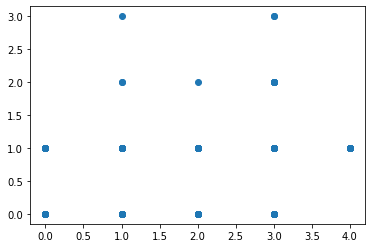

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test,ypred)
plt.show()

In [ ]:
#LDA

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf2=LinearDiscriminantAnalysis()
import time
st=time.time()
clf2.fit(X_train,y_train)
et=time.time()
print("Training Time: ",et-st)

Training Time:  3.2751641273498535


In [ ]:
#Accuracy
print(clf2.score(X_test,y_test))
st=time.time()
ypred=clf2.predict(X_test)
et=time.time()
print("Prediction Time: ",et-st)
ypred2=clf.predict_proba(X_test)
#Missclassification
mc=1-score
print(mc)

0.9915590461924618
Prediction Time:  0.03682088851928711
0.019017448686287963


In [ ]:
#Recall score
from sklearn.metrics import recall_score
print(recall_score(y_test,ypred,average='weighted'))
#PRECISION score
from sklearn.metrics import precision_score
print(precision_score(y_test,ypred,average='weighted'))
#F1 Score
from sklearn.metrics import f1_score
print(f1_score(y_test,ypred,average='weighted'))
#ROC AUC score
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test,ypred2,average='weighted',multi_class='ovr'))

0.9915590461924618
0.9919287652967451
0.9916858993768256
0.9938311750712768


In [ ]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ypred,y_test)
print(cm)

[[77654    35    18     1     0]
 [  482 19369    35    29     3]
 [   45   116   768     1     0]
 [    2    62     0   175     1]
 [    0     2     0     2     4]]


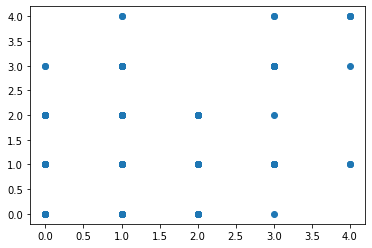

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test,ypred)
plt.show()

In [ ]:
#KNN

from sklearn.neighbors import KNeighborsClassifier
clf2=KNeighborsClassifier()
import time
st=time.time()
clf2.fit(X_train,y_train)
et=time.time()
print("Training Time: ",et-st)

Training Time:  124.59625959396362


In [ ]:
#Accuracy
print(clf2.score(X_test,y_test))
st=time.time()
ypred=clf2.predict(X_test)
et=time.time()
print("Prediction Time: ",et-st)
ypred2=clf.predict_proba(X_test)
#Missclassification
mc=1-score
print(mc)

0.9989980162746448
Prediction Time:  775.3274972438812
0.019017448686287963


In [ ]:
#Recall score
from sklearn.metrics import recall_score
print(recall_score(y_test,ypred,average='weighted'))
#PRECISION score
from sklearn.metrics import precision_score
print(precision_score(y_test,ypred,average='weighted'))
#F1 Score
from sklearn.metrics import f1_score
print(f1_score(y_test,ypred,average='weighted'))
#ROC AUC score
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test,ypred2,average='weighted',multi_class='ovr'))

0.9989980162746448
0.9989776231979384
0.9989745632879258
0.9938311750712768


In [ ]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ypred,y_test)
print(cm)

[[78175     9    38     0     0]
 [    6 19558    12     9     6]
 [    2     6   771     0     0]
 [    0    10     0   199     0]
 [    0     1     0     0     2]]


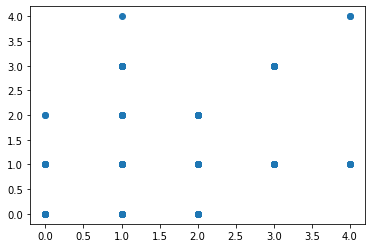

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test,ypred)
plt.show()

In [ ]:
#Naive-Bayes

from sklearn.naive_bayes import GaussianNB
clf2=GaussianNB()
import time
st=time.time()
clf2.fit(X_train,y_train)
et=time.time()
print("Training Time: ",et-st)

Training Time:  0.3022117614746094


In [ ]:
#Accuracy
print(clf2.score(X_test,y_test))
st=time.time()
ypred=clf2.predict(X_test)
et=time.time()
print("Prediction Time: ",et-st)
ypred2=clf.predict_proba(X_test)
#Missclassification
mc=1-score
print(mc)

0.9002874377555564
Prediction Time:  0.12041521072387695
0.019017448686287963


In [ ]:
#Recall score
from sklearn.metrics import recall_score
print(recall_score(y_test,ypred,average='weighted'))
#PRECISION score
from sklearn.metrics import precision_score
print(precision_score(y_test,ypred,average='weighted'))
#F1 Score
from sklearn.metrics import f1_score
print(f1_score(y_test,ypred,average='weighted'))
#ROC AUC score
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test,ypred2,average='weighted',multi_class='ovr'))

0.9002874377555564
0.9091063752580077
0.8941182889927416
0.9938311750712768


In [ ]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ypred,y_test)
print(cm)

[[77694  7011   528    10     0]
 [  426 11230   186    57     2]
 [    4   233    17     6     0]
 [    0    29     0     5     0]
 [   59  1081    90   130     6]]


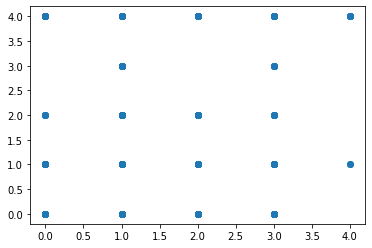

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test,ypred)
plt.show()

In [ ]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
clf2=DecisionTreeClassifier()
import time
st=time.time()
clf2.fit(X_train,y_train)
et=time.time()
print("Training Time: ",et-st)

Training Time:  1.9907472133636475


In [ ]:
#Accuracy
print(clf2.score(X_test,y_test))
st=time.time()
ypred=clf2.predict(X_test)
et=time.time()
print("Prediction Time: ",et-st)
ypred2=clf.predict_proba(X_test)
#Missclassification
mc=1-score
print(mc)

0.9997773369499211
Prediction Time:  0.024661779403686523
0.019017448686287963


In [ ]:
#Recall score
from sklearn.metrics import recall_score
print(recall_score(y_test,ypred,average='weighted'))
#PRECISION score
from sklearn.metrics import precision_score
print(precision_score(y_test,ypred,average='weighted'))
#F1 Score
from sklearn.metrics import f1_score
print(f1_score(y_test,ypred,average='weighted'))
#ROC AUC score
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test,ypred2,average='weighted',multi_class='ovr'))

0.9997773369499211
0.9997872658852202
0.9997816413018454
0.9938311750712768


In [ ]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ypred,y_test)
print(cm)

[[78178     0     0     0     0]
 [    4 19576     0     2     3]
 [    1     3   821     0     0]
 [    0     4     0   202     0]
 [    0     1     0     4     5]]


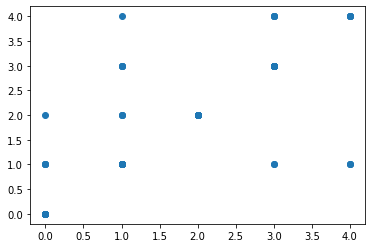

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test,ypred)
plt.show()

In [ ]:
#RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier
clf2=RandomForestClassifier()
import time
st=time.time()
clf2.fit(X_train,y_train)
et=time.time()
print("Training Time: ",et-st)

Training Time:  25.16708993911743


In [ ]:
#Accuracy
print(clf2.score(X_test,y_test))
st=time.time()
ypred=clf2.predict(X_test)
et=time.time()
print("Prediction Time: ",et-st)
ypred2=clf.predict_proba(X_test)
#Missclassification
mc=1-score
print(mc)

0.9997975790453828
Prediction Time:  0.9454472064971924
0.019017448686287963


In [ ]:
#Recall score
from sklearn.metrics import recall_score
print(recall_score(y_test,ypred,average='weighted'))
#PRECISION score
from sklearn.metrics import precision_score
print(precision_score(y_test,ypred,average='weighted'))
#F1 Score
from sklearn.metrics import f1_score
print(f1_score(y_test,ypred,average='weighted'))
#ROC AUC score
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test,ypred2,average='weighted',multi_class='ovr'))

0.9997975790453828
0.9997970620230521
0.9997969775401923
0.9938311750712768


In [ ]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ypred,y_test)
print(cm)

[[78182     0     0     0     0]
 [    0 19581     5     4     3]
 [    1     1   816     0     0]
 [    0     1     0   201     1]
 [    0     1     0     3     4]]


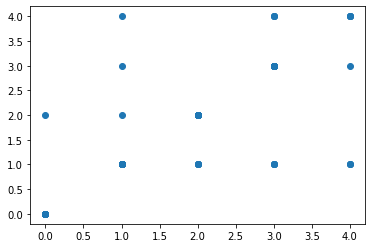

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test,ypred)
plt.show()

### Performance Evaluation
|Sr No| Classifier| Training Time| Prediction Time|Accuracy|Miss-Claa|Precision|Recall|F1-Measure|Kohen'Kappa|AUC|ROC|
|---|---|

|Classfier Name|Tr Time|Pred Time|Accuracy|Missclassification|Precision|Recall|F1-measure|AUC ROC|
|----    |:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---::---:|
|Logistic Regression    |58.64835858345032|0.03470301628112793|0.980982551313712|0.019017448686287963|0.9734609195058377|0.980982551313712|0.9760047680606279|0.9938311750712768
|Linear Discrimant Analysis (LDA)    |3.2751641273498535|0.03682088851928711|0.9915590461924618|0.019017448686287963|0.9919287652967451|0.9915590461924618|0.9916858993768256|0.9938311750712768||
|KNN   |124.59625959396362|775.3274972438812|0.9989980162746448|0.019017448686287963|0.9989776231979384|0.9989980162746448|0.9916858993768256|0.9938311750712768||
|Naive-Bayes |0.3022117614746094|0.12041521072387695|0.9002874377555564|0.019017448686287963|0.9091063752580077|0.9002874377555564|0.8941182889927416|0.9938311750712768||
|Decision Tree   |1.9907472133636475|0.024661779403686523|0.9997773369499211|0.019017448686287963|0.9997872658852202|0.9997773369499211|0.9997816413018454|0.9938311750712768||
|Random Forest   |25.16708993911743|0.9454472064971924|0.9997975790453828|0.019017448686287963|0.9997970620230521|0.9997975790453828|0.9997969775401923|0.9938311750712768||




CONCLUSION:

Thus the above mentioned 6 classifiers were used for the analysis of the KDDCUP IDS Dataset & the results are tabulated above.